In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import plotly.express as px

plt.style.use("seaborn-v0_8")

In [17]:
# Carga de datos

df_clusters = pd.read_excel("df_clusters.xlsx")

En la primera visualización trataremos de ver cuántas empresas tenemos en cada cluster, distinguiendo el número de empresas de cada provincia con el color.

Para ello, prepararemos los datos, creando una dataframe para cada provincia.

In [18]:
# Visualización 1: Preparación de datos

alava = df_clusters[df_clusters["Provincia_Alava"]==True]
gipuzkoa = df_clusters[df_clusters["Provincia_Guipuzcoa"]==True]
bizkaia = df_clusters[df_clusters["Provincia_Guipuzcoa"]==False]
bizkaia = bizkaia[df_clusters["Provincia_Alava"]==False]

alava_count = alava.value_counts("Cluster kmeans").sort_index()
gipuzkoa_count = gipuzkoa.value_counts("Cluster kmeans").sort_index()
bizkaia_count = bizkaia.value_counts("Cluster kmeans").sort_index()

C:\Users\benat\AppData\Local\Temp\ipykernel_16776\3038026143.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Total de empresas por cluster')

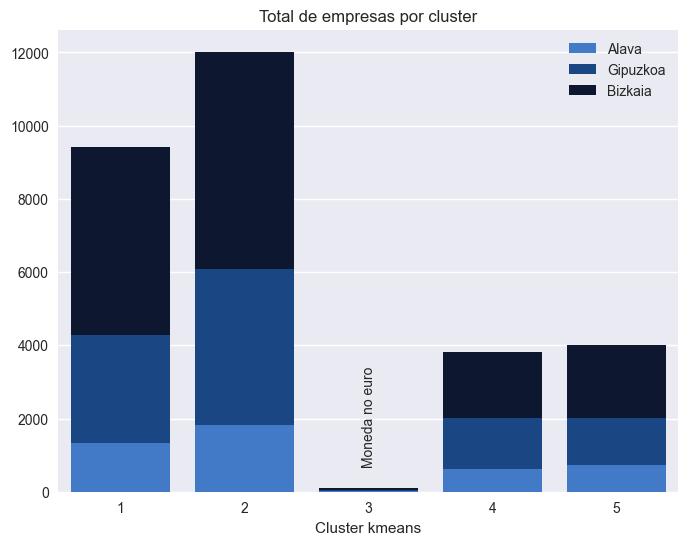

In [19]:
# Visualización 1

fig1, ax1, = plt.subplots(figsize=(8,6))

ax1 = sns.barplot(x=alava_count.index,y=alava_count.values,color="#2c76de",label="Alava")
ax1 = sns.barplot(x=gipuzkoa_count.index,y=gipuzkoa_count.values,bottom=alava_count.values,color="#084396",label="Gipuzkoa")
ax1 = sns.barplot(x=bizkaia_count.index,y=bizkaia_count.values,bottom=(alava_count.values+gipuzkoa_count.values),color="#071436",label="Bizkaia")

ax1.annotate("Moneda no euro",xy=(1.95,750),rotation=90)

ax1.set_title("Total de empresas por cluster")

En la segunda visualización, haremos un boxplot para ver la distribución de la variable 'Total activo\nmil EUR\n2022' de cada cluster.

Dejaremos fuera de la visualización el cluster número 5, ya que es significativamente más grande que los otros, y el gráfico perdería sentido.

In [20]:
# Visualización 2

fig7 = px.box(df_clusters[df_clusters["Cluster kmeans"]!=5],x="Cluster kmeans", y = 'Total activo\nmil EUR\n2022',
              color="Cluster kmeans",
              color_discrete_map={1: "#071436",2:"#084396",3:"#2c76de",4:"#84b1f0"},
              title="Total Activo por cluster")

fig7.update_layout(showlegend=False,
                   width=650,
                   height=600)

fig7.show()

En la tercera visualización, compararemos los ratios de cada cluster, comparándolos con la media de todos los ratios (2.5). Si los ratios están por debajo de ese baremo, entenderemos que las empresas de ese cluster tienen unos estados financieros no deseables.

Haremos un gráfico para cada cluster.

In [21]:
df_clusters

,Código NIF,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Sectores_Actividades Profesionales y Financieras,Sectores_Comercio,Sectores_Construccion e Inmobilarias,Sectores_Hosteleria,Sectores_Industria,Sectores_Transporte,Moneda no euro,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate,Cluster kmeans,Nombre_kmeans,Nombre
0,B95798278,False,False,2764.00000,False,False,False,True,False,False,False,False,1,1,4,4,4,Medianas_Empresas,INBISA SANCHINARRO SOCIEDAD LIMITADA.
1,B95869509,False,False,2826.00000,False,False,False,True,False,False,False,False,1,1,2,4,4,Medianas_Empresas,INBISA VALDEBEBAS SOCIEDAD LIMITADA.
2,B20779468,False,False,3176.44937,False,False,False,False,False,False,False,False,2,2,1,3,4,Medianas_Empresas,AZTERTZEN SERVICIOS ASISTENCIALES SOCIEDAD LIM...
3,A28784635,False,False,1255.54300,False,False,False,False,False,False,True,False,3,3,4,4,2,Pequeñas_empresas_con_buenas_ratios,ECO MARITIMA SOCIEDAD ANONIMA
4,A48173975,False,False,2959.21695,False,False,False,False,False,False,False,False,3,0,4,3,4,Medianas_Empresas,BINCANO SOCIEDAD ANONIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,B01451459,True,False,3727.52321,False,True,False,False,False,False,False,False,1,0,2,0,5,Grandes_Empresas,PRAXIS BIOPHARMA RESEARCH INSTITUTE SL
29354,B01404672,True,False,5137.45046,False,False,False,True,False,False,False,False,1,4,2,1,5,Grandes_Empresas,PROMOTORA MUBER 2006 SL
29355,B01518513,True,False,8474.33033,False,False,False,True,False,False,False,False,1,1,2,1,5,Grandes_Empresas,RESIDENCIAL AREITIO S.L.
29356,B01384627,True,False,8116.22665,False,False,False,True,False,False,False,False,1,3,2,2,5,Grandes_Empresas,RESIDENCIALES RIOJAALAVESA SL


In [22]:
# Visualizacion 3: Preparación de datos

clusters_agrupado = df_clusters[["Endeudamiento_cate","Solvencia","Evolucion_ventas_cate","ROA_cate","Cluster kmeans"]].groupby("Cluster kmeans").mean()

cluster_1 = clusters_agrupado[["Endeudamiento_cate","Solvencia","Evolucion_ventas_cate","ROA_cate"]].loc[1]
cluster_2 = clusters_agrupado[["Endeudamiento_cate","Solvencia","Evolucion_ventas_cate","ROA_cate"]].loc[2]
cluster_3 = clusters_agrupado[["Endeudamiento_cate","Solvencia","Evolucion_ventas_cate","ROA_cate"]].loc[3]
cluster_4 = clusters_agrupado[["Endeudamiento_cate","Solvencia","Evolucion_ventas_cate","ROA_cate"]].loc[4]
cluster_5 = clusters_agrupado[["Endeudamiento_cate","Solvencia","Evolucion_ventas_cate","ROA_cate"]].loc[5]

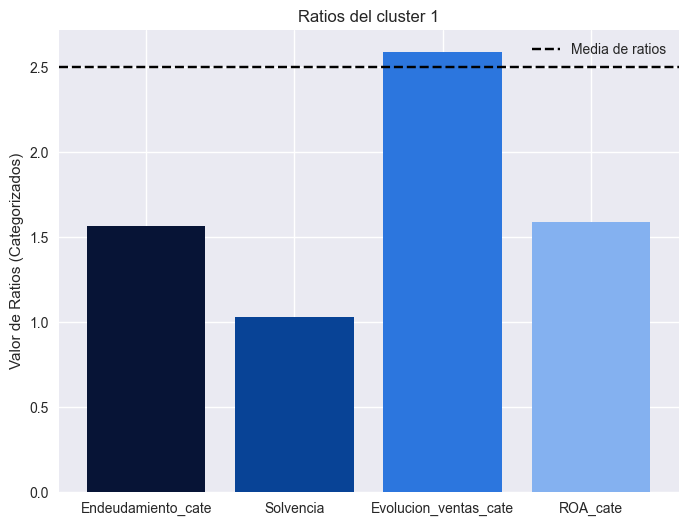

In [23]:
# Visualizacion 3.1

fig2, ax2 = plt.subplots(figsize=(8,6))

ax2.bar(cluster_1.index,cluster_1.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax2.set_title("Ratios del cluster 1")
ax2.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax2.set_ylabel("Valor de Ratios (Categorizados)")

ax2.legend()

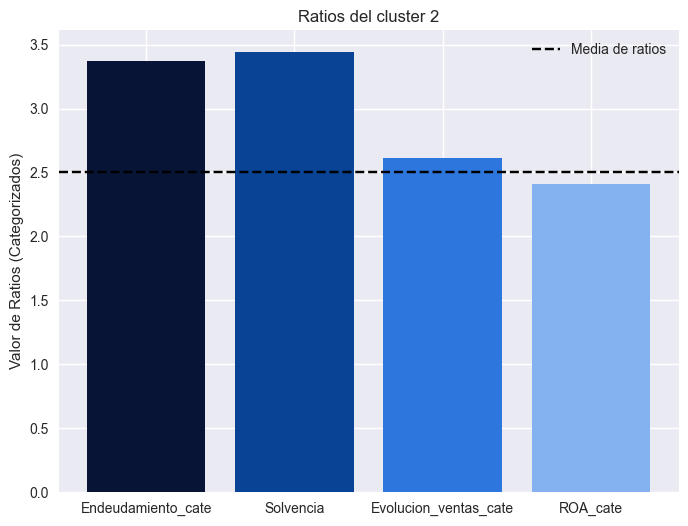

In [24]:
# Visualizacion 3.2

fig3, ax3 = plt.subplots(figsize=(8,6))

ax3.bar(cluster_2.index,cluster_2.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax3.set_title("Ratios del cluster 2")
ax3.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax3.set_ylabel("Valor de Ratios (Categorizados)")

ax3.legend()

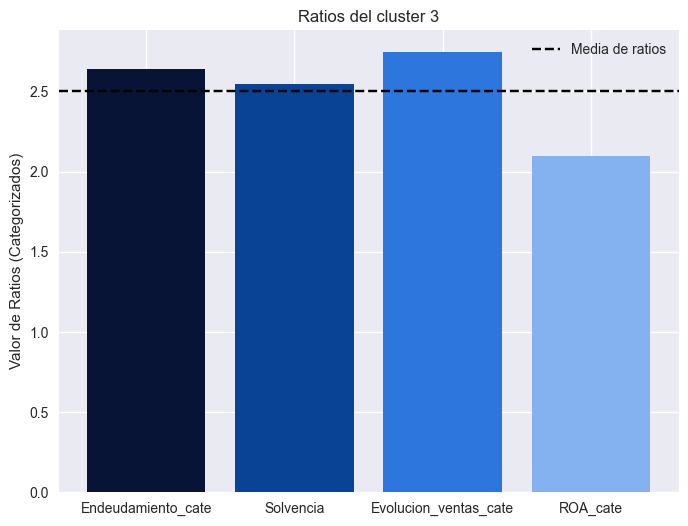

In [25]:
# Visualizacion 3.3

fig4, ax4 = plt.subplots(figsize=(8,6))

ax4.bar(cluster_3.index,cluster_3.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax4.set_title("Ratios del cluster 3")
ax4.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax4.set_ylabel("Valor de Ratios (Categorizados)")

ax4.legend()

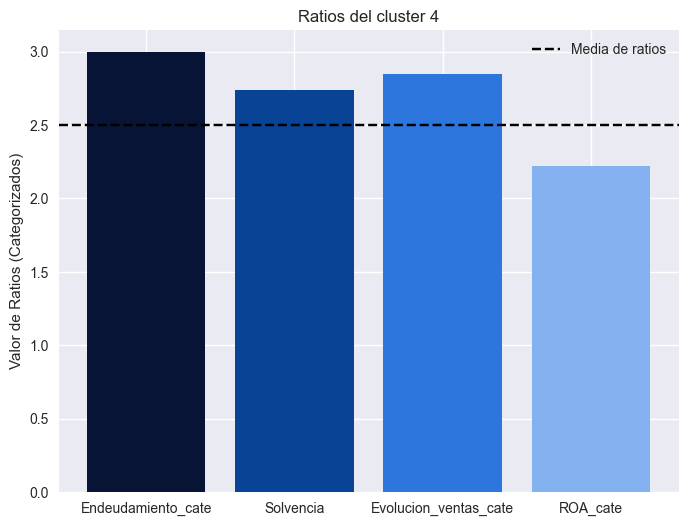

In [26]:
# Visualizacion 3.4

fig5, ax5 = plt.subplots(figsize=(8,6))

ax5.bar(cluster_4.index,cluster_4.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax5.set_title("Ratios del cluster 4")
ax5.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax5.set_ylabel("Valor de Ratios (Categorizados)")

ax5.legend()

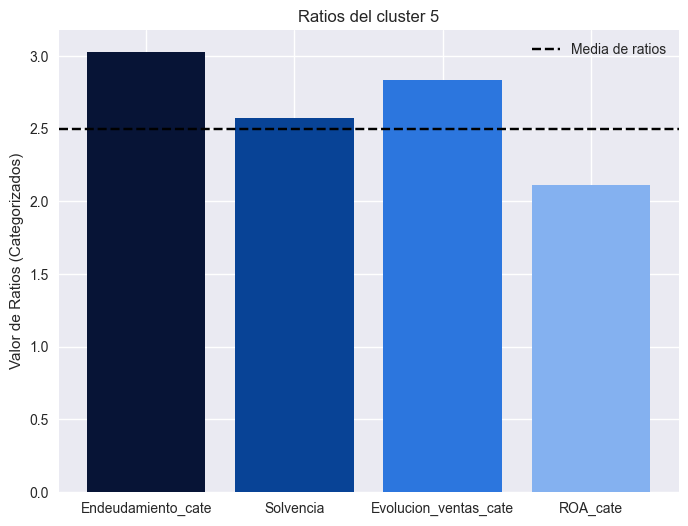

In [27]:
# Visualizacion 3.5

fig6, ax6 = plt.subplots(figsize=(8,6))

ax6.bar(cluster_5.index,cluster_5.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax6.set_title("Ratios del cluster 5")
ax6.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax6.set_ylabel("Valor de Ratios (Categorizados)")

ax6.legend()